In [30]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
url = 'https://raw.githubusercontent.com/codebasics/py/master/ML/13_kmeans/income.csv'
df = pd.read_csv(url)

In [32]:
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


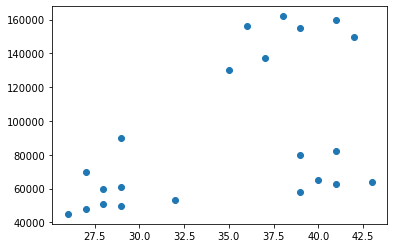

In [33]:
plt.scatter(x='Age',y='Income($)',data=df)

In [34]:
from sklearn.cluster import KMeans

In [35]:
kmeans = KMeans(n_clusters=3)

In [36]:
 kmeans.fit(df.drop('Name',axis=1))

KMeans(n_clusters=3)

In [37]:
kmeans.labels_

array([1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2])

In [38]:
df['Cluster'] = kmeans.labels_

In [39]:
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,0


In [40]:
df0 = df[df['Cluster'] == 0]
df1 = df[df['Cluster'] == 1]
df2 = df[df['Cluster'] == 2]

<AxesSubplot:xlabel='Age', ylabel='Income($)'>

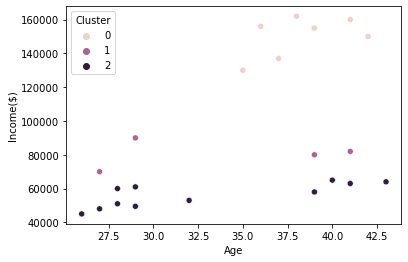

In [41]:
sns.scatterplot(x=df['Age'],y=df['Income($)'],hue=df['Cluster'])

In [70]:
from sklearn.preprocessing import MinMaxScaler

In [71]:
scaler = MinMaxScaler()

In [72]:
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,0


In [73]:
scaler.fit(df.drop(['Name','Cluster'],axis=1))

MinMaxScaler()

In [74]:
scaled_feat = scaler.transform(df.drop(['Name','Cluster'],axis=1))

In [75]:
scaled_feat

array([[0.05882353, 0.21367521],
       [0.17647059, 0.38461538],
       [0.17647059, 0.13675214],
       [0.11764706, 0.12820513],
       [0.94117647, 0.8974359 ],
       [0.76470588, 0.94017094],
       [0.88235294, 0.98290598],
       [0.70588235, 1.        ],
       [0.58823529, 0.94871795],
       [0.52941176, 0.72649573],
       [0.64705882, 0.78632479],
       [0.        , 0.        ],
       [0.05882353, 0.02564103],
       [0.11764706, 0.05128205],
       [0.17647059, 0.03846154],
       [0.35294118, 0.06837607],
       [0.82352941, 0.17094017],
       [0.88235294, 0.15384615],
       [1.        , 0.16239316],
       [0.76470588, 0.2991453 ],
       [0.88235294, 0.31623932],
       [0.76470588, 0.11111111]])

In [76]:
standard_feat = pd.DataFrame(scaled_feat,columns=['Age','Income'])

In [77]:
standard_feat.head()

,Age,Income
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


In [78]:
k_means_std = KMeans(n_clusters=3)

In [79]:
k_means_std.fit(standard_feat)

KMeans(n_clusters=3)

In [80]:
k_means_std.labels_

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [81]:
standard_feat['Cluster'] = k_means_std.labels_

In [82]:
standard_feat.head()

,Age,Income,Cluster
0,0.058824,0.213675,1
1,0.176471,0.384615,1
2,0.176471,0.136752,1
3,0.117647,0.128205,1
4,0.941176,0.897436,0


In [83]:
k_means_std.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Income'>

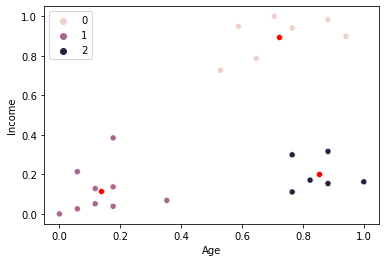

In [84]:
sns.scatterplot(x='Age',y='Income',data=standard_feat,hue='Cluster')
sns.scatterplot(k_means_std.cluster_centers_[:,0],k_means_std.cluster_centers_[:,1],color = 'red',markers='+')

In [87]:
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(standard_feat.drop('Cluster',axis=1))
    sse.append(km.inertia_)

In [88]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3625079900797329,
 0.2621792762345213,
 0.21055478995472496,
 0.17840674931327935,
 0.14090581089405507,
 0.10497488680620906]

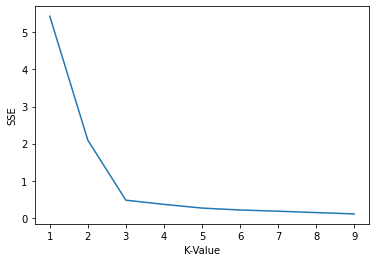

In [89]:
plt.xlabel('K-Value')
plt.ylabel('SSE')
plt.plot(k_range,sse)